# Final Lab Classification - Fashion MNIST

## Wince Larcen M. Rivano
## CS190-2P - CIS303

## Importing of Modules

In [4]:
!pip install xgboost

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score

## Importing of Dataset

In [8]:
X_train = pd.read_csv("X_fashion_mnist_train.csv")
X_test = pd.read_csv("X_fashion_mnist_test.csv")
y_train = pd.read_csv("y_fashion_mnist_train.csv")

In [9]:
X_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_test.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,3,0,3,174,189,67,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,164,58,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,1,1,0,0,0,...,71,12,0,0,0,0,0,0,0,0


In [11]:
y_train.head()

,label
0,9
1,0
2,0
3,3
4,0


## Exploratory Data Analysis

In [13]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000, 1)


In [14]:
# Checking of Null Values
print(X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), y_train.isnull().sum().sum())

0 0 0


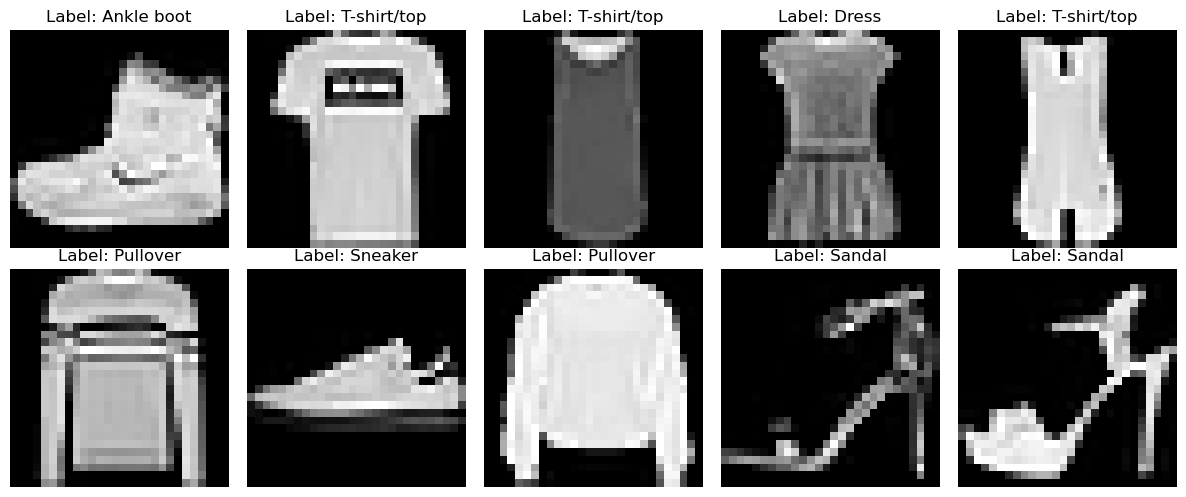

In [15]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

def show_images(X, y, num_images=10):
    plt.figure(figsize=(12, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(X.iloc[i].values.reshape(28, 28), cmap="gray")
        label_index = y.iloc[i, 0] if isinstance(y, pd.DataFrame) else y.iloc[i]
        plt.title(f"Label: {class_names[label_index]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_images(X_train, y_train)


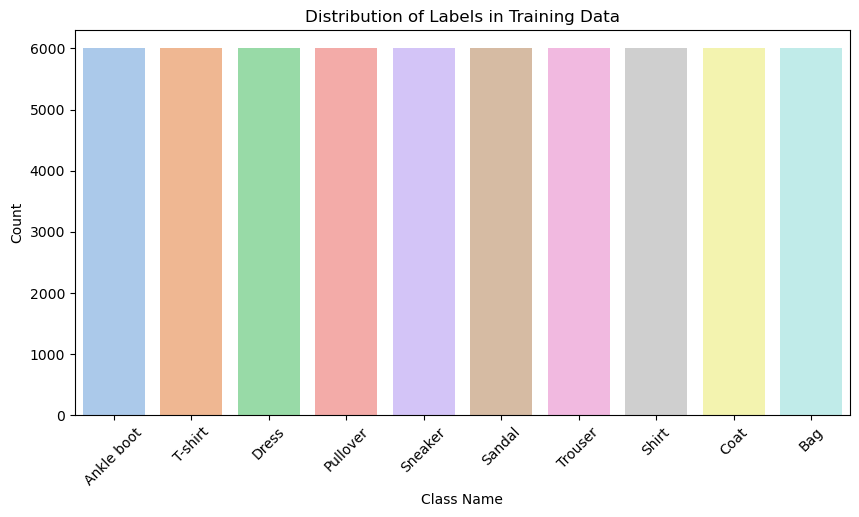

In [16]:
idx_to_class = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


y_train_array = np.array(y_train).flatten()

# Create DataFrame
y_train_df = pd.DataFrame({'label': y_train_array})
y_train_df['class_name'] = y_train_df['label'].map(idx_to_class)

plt.figure(figsize=(10, 5))
sns.countplot(
    x=y_train_df['class_name'],
    hue=y_train_df['class_name'],
    palette='pastel',
    legend=False
)
plt.title("Distribution of Labels in Training Data")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

## Feature Engineering and Scaling

In [18]:
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

X_train_s_scaled = s_scaler.fit_transform(X_train)
X_test_s_scaled = s_scaler.transform(X_test)

X_train_m_scaled = m_scaler.fit_transform(X_train)
X_test_m_scaled = m_scaler.transform(X_test)

In [19]:
from sklearn.decomposition import PCA

# Retain 95% of the variance
s_pca = PCA(n_components=100, random_state=42)
X_train_s_pca = s_pca.fit_transform(X_train_s_scaled)
X_test_s_pca = s_pca.transform(X_test_s_scaled)

m_pca = PCA(n_components=100, random_state=42)
X_train_m_pca = m_pca.fit_transform(X_train_m_scaled)
X_test_m_pca = m_pca.transform(X_test_m_scaled)

raw_pca = PCA(n_components=100, random_state=42)
X_train_raw_pca = raw_pca.fit_transform(X_train)
X_test_raw_pca = raw_pca.transform(X_test)


In [20]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  # Adjust as needed
X_train_s_var = selector.fit_transform(X_train_s_scaled)
X_test_s_var = selector.transform(X_test_s_scaled)


In [21]:
X_train_s_final, X_val_s, y_train_s_final, y_val_s = train_test_split(
    X_train_s_pca, y_train, test_size=0.2, random_state=42, stratify=y_train
)

X_train_m_final, X_val_m, y_train_m_final, y_val_m = train_test_split(
    X_train_m_pca, y_train, test_size=0.2, random_state=42, stratify=y_train
)

X_train_raw_final, X_val_raw, y_train_raw_final, y_val_raw = train_test_split(
    X_train_raw_pca, y_train, test_size=0.2, random_state=42, stratify=y_train
)

## Logistic Regression

### using Standard Scaled Data

In [24]:
lr = LogisticRegression(
    C=1,                
    penalty='l2',       
    solver='lbfgs',      
    max_iter=10000,
    random_state=42,
    n_jobs=-1,
    verbose=0
)


lr.fit(X_train_s_final, y_train_s_final.values.ravel())

lr_y_pred_s = lr.predict(X_val_s)

print("Validation Set Classification Report (F1):")
print(classification_report(y_val_s, lr_y_pred_s, digits=4))

lr_f1_macro_s = f1_score(y_val_s, lr_y_pred_s, average='macro')
print(f"Macro-Average F1 Score: {lr_f1_macro_s:.4f}")


Validation Set Classification Report (F1):
              precision    recall  f1-score   support

           0     0.8054    0.8383    0.8216      1200
           1     0.9705    0.9608    0.9657      1200
           2     0.7529    0.7467    0.7498      1200
           3     0.8481    0.8608    0.8544      1200
           4     0.7343    0.7600    0.7469      1200
           5     0.9392    0.9525    0.9458      1200
           6     0.6612    0.6017    0.6300      1200
           7     0.9258    0.9250    0.9254      1200
           8     0.9535    0.9575    0.9555      1200
           9     0.9525    0.9525    0.9525      1200

    accuracy                         0.8556     12000
   macro avg     0.8544    0.8556    0.8548     12000
weighted avg     0.8544    0.8556    0.8548     12000

Macro-Average F1 Score: 0.8548


### using Min-Max Scaled Data

In [26]:
lr = LogisticRegression(
    C=1,                
    penalty='l2',       
    solver='lbfgs',      
    max_iter=10000,
    random_state=42,
    n_jobs=-1,
    verbose=0
)


lr.fit(X_train_m_final, y_train_m_final.values.ravel())

lr_y_pred_m = lr.predict(X_val_m)

print("Validation Set Classification Report (F1):")
print(classification_report(y_val_m, lr_y_pred_m, digits=4))

lr_f1_macro_m = f1_score(y_val_m, lr_y_pred_m, average='macro')
print(f"Macro-Average F1 Score: {lr_f1_macro_m:.4f}")


Validation Set Classification Report (F1):
              precision    recall  f1-score   support

           0     0.8103    0.8400    0.8249      1200
           1     0.9739    0.9642    0.9690      1200
           2     0.7496    0.7458    0.7477      1200
           3     0.8528    0.8642    0.8584      1200
           4     0.7408    0.7717    0.7559      1200
           5     0.9468    0.9500    0.9484      1200
           6     0.6679    0.6100    0.6376      1200
           7     0.9302    0.9333    0.9318      1200
           8     0.9527    0.9558    0.9542      1200
           9     0.9533    0.9533    0.9533      1200

    accuracy                         0.8588     12000
   macro avg     0.8578    0.8588    0.8581     12000
weighted avg     0.8578    0.8588    0.8581     12000

Macro-Average F1 Score: 0.8581


### using No Scaling

In [28]:
lr = LogisticRegression(
    C=1,                
    penalty='l2',       
    solver='lbfgs',      
    max_iter=10000,
    random_state=42,
    n_jobs=-1,
    verbose=0
)


lr.fit(X_train_raw_final, y_train_raw_final.values.ravel())

lr_y_pred_raw = lr.predict(X_val_raw)

print("Validation Set Classification Report (F1):")
print(classification_report(y_val_raw, lr_y_pred_raw, digits=4))

lr_f1_macro_raw = f1_score(y_val_raw, lr_y_pred_raw, average='macro')
print(f"Macro-Average F1 Score: {lr_f1_macro_raw:.4f}")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Set Classification Report (F1):
              precision    recall  f1-score   support

           0     0.8110    0.8367    0.8236      1200
           1     0.9714    0.9633    0.9674      1200
           2     0.7508    0.7458    0.7483      1200
           3     0.8506    0.8633    0.8569      1200
           4     0.7434    0.7700    0.7564      1200
           5     0.9421    0.9492    0.9456      1200
           6     0.6597    0.6075    0.6325      1200
           7     0.9272    0.9333    0.9302      1200
           8     0.9517    0.9517    0.9517      1200
           9     0.9532    0.9508    0.9520      1200

    accuracy                         0.8572     12000
   macro avg     0.8561    0.8572    0.8565     12000
weighted avg     0.8561    0.8572    0.8565     12000

Macro-Average F1 Score: 0.8565


### Best Performing Logistic Regression Method

In [30]:
lr_f1_scores = {
    'Standard Scaled': lr_f1_macro_s,
    'Min-Max Scaled': lr_f1_macro_m,
    'Raw (No Scaling)': lr_f1_macro_raw
}

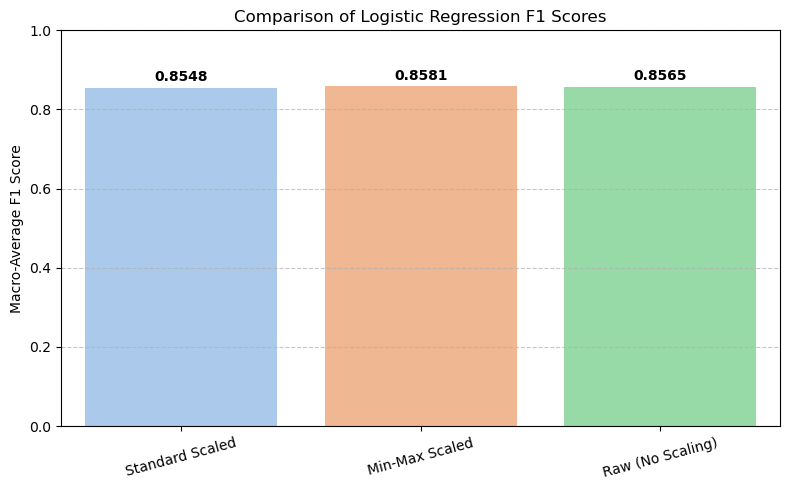

In [31]:
labels = list(lr_f1_scores.keys())
scores = list(lr_f1_scores.values())

plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    x=labels,
    y=scores,
    hue=labels,         
    palette="pastel",
    dodge=False       
)

# Add text labels above each bar
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    barplot.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.4f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Formatting
plt.ylim(0, 1.0)
plt.ylabel('Macro-Average F1 Score')
plt.title('Comparison of Logistic Regression F1 Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [32]:
best_lr_model_name = max(lr_f1_scores, key=lr_f1_scores.get)
best_lr_f1_score = lr_f1_scores[best_lr_model_name]

print(f"\n✅ Best Performing Logistic Regression Model: {best_lr_model_name}")
print(f"🏆 Best Macro-Average F1 Score: {best_lr_f1_score:.4f}")


✅ Best Performing Logistic Regression Model: Min-Max Scaled
🏆 Best Macro-Average F1 Score: 0.8581


## Softmax Regression

### using Standard Scaled Data

In [35]:
sm = LogisticRegression(
    C=1,
    penalty='l2',
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=10000,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

sm.fit(X_train_s_final, y_train_s_final.values.ravel())
sm_y_pred_s = sm.predict(X_val_s)

print("Validation Set Classification Report (Standard Scaled):")
print(classification_report(y_val_s, sm_y_pred_s, digits=4))

sm_f1_macro_s = f1_score(y_val_s, sm_y_pred_s, average='macro')
print(f"Macro-Average F1 Score (Standard Scaled): {sm_f1_macro_s:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Set Classification Report (Standard Scaled):
              precision    recall  f1-score   support

           0     0.8054    0.8383    0.8216      1200
           1     0.9705    0.9608    0.9657      1200
           2     0.7529    0.7467    0.7498      1200
           3     0.8481    0.8608    0.8544      1200
           4     0.7343    0.7600    0.7469      1200
           5     0.9392    0.9525    0.9458      1200
           6     0.6612    0.6017    0.6300      1200
           7     0.9258    0.9250    0.9254      1200
           8     0.9535    0.9575    0.9555      1200
           9     0.9525    0.9525    0.9525      1200

    accuracy                         0.8556     12000
   macro avg     0.8544    0.8556    0.8548     12000
weighted avg     0.8544    0.8556    0.8548     12000

Macro-Average F1 Score (Standard Scaled): 0.8548


### using Min-Max Scaled Data

In [37]:
sm = LogisticRegression(
    C=1,
    penalty='l2',
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=10000,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

sm.fit(X_train_m_final, y_train_m_final.values.ravel())
sm_y_pred_m = sm.predict(X_val_m)

print("Validation Set Classification Report (Min-Max Scaled):")
print(classification_report(y_val_m, sm_y_pred_m, digits=4))

sm_f1_macro_m = f1_score(y_val_m, sm_y_pred_m, average='macro')
print(f"Macro-Average F1 Score (Min-Max Scaled): {sm_f1_macro_m:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Set Classification Report (Min-Max Scaled):
              precision    recall  f1-score   support

           0     0.8103    0.8400    0.8249      1200
           1     0.9739    0.9642    0.9690      1200
           2     0.7496    0.7458    0.7477      1200
           3     0.8528    0.8642    0.8584      1200
           4     0.7408    0.7717    0.7559      1200
           5     0.9468    0.9500    0.9484      1200
           6     0.6679    0.6100    0.6376      1200
           7     0.9302    0.9333    0.9318      1200
           8     0.9527    0.9558    0.9542      1200
           9     0.9533    0.9533    0.9533      1200

    accuracy                         0.8588     12000
   macro avg     0.8578    0.8588    0.8581     12000
weighted avg     0.8578    0.8588    0.8581     12000

Macro-Average F1 Score (Min-Max Scaled): 0.8581


### using No Scaling

In [39]:
sm = LogisticRegression(
    C=1,
    penalty='l2',
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=10000,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

sm.fit(X_train_raw_final, y_train_raw_final.values.ravel())
sm_y_pred_raw = sm.predict(X_val_raw)

print("Validation Set Classification Report (Raw Features):")
print(classification_report(y_val_raw, sm_y_pred_raw, digits=4))

sm_f1_macro_raw = f1_score(y_val_raw, sm_y_pred_raw, average='macro')
print(f"Macro-Average F1 Score (Raw Features): {sm_f1_macro_raw:.4f}")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Set Classification Report (Raw Features):
              precision    recall  f1-score   support

           0     0.8110    0.8367    0.8236      1200
           1     0.9714    0.9633    0.9674      1200
           2     0.7508    0.7458    0.7483      1200
           3     0.8506    0.8633    0.8569      1200
           4     0.7434    0.7700    0.7564      1200
           5     0.9421    0.9492    0.9456      1200
           6     0.6597    0.6075    0.6325      1200
           7     0.9272    0.9333    0.9302      1200
           8     0.9517    0.9517    0.9517      1200
           9     0.9532    0.9508    0.9520      1200

    accuracy                         0.8572     12000
   macro avg     0.8561    0.8572    0.8565     12000
weighted avg     0.8561    0.8572    0.8565     12000

Macro-Average F1 Score (Raw Features): 0.8565


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Best Performing Softmax Regression Method

In [41]:
sm_f1_scores = {
    'Standard Scaled': sm_f1_macro_s,
    'Min-Max Scaled': sm_f1_macro_m,
    'Raw (No Scaling)': sm_f1_macro_raw
}

labels = list(sm_f1_scores.keys())
scores = list(sm_f1_scores.values())

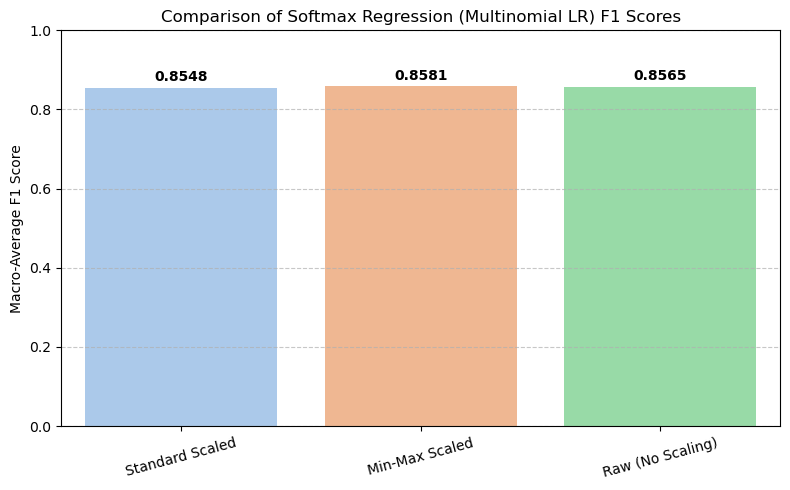

In [42]:
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=labels, y=scores,hue=labels, palette="pastel")

# Add F1 scores as text on each bar
for bar in barplot.patches:
    height = bar.get_height()
    barplot.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{height:.4f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Plot formatting
plt.ylim(0, 1.0)
plt.ylabel('Macro-Average F1 Score')
plt.title('Comparison of Softmax Regression (Multinomial LR) F1 Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [43]:
best_sm_model_name = max(sm_f1_scores, key=sm_f1_scores.get)
best_sm_f1_score = sm_f1_scores[best_sm_model_name]

print(f"\n✅ Best Performing Softmax Regression Model: {best_sm_model_name}")
print(f"🏆 Best Macro-Average F1 Score: {best_sm_f1_score:.4f}")


✅ Best Performing Softmax Regression Model: Min-Max Scaled
🏆 Best Macro-Average F1 Score: 0.8581


## KNN

In [45]:
param_grid = {
    'n_neighbors': list(range(1, 31))
}

### using Standard Scaled Data

In [47]:
knn_s = GridSearchCV(
    KNeighborsClassifier(n_jobs=-1),
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
knn_s.fit(X_train_s_final, y_train_s_final.values.ravel())
best_k_s = knn_s.best_params_['n_neighbors']
print(f"✅ Best k (Standard Scaled): {best_k_s}")

knn_model_s = KNeighborsClassifier(n_neighbors=best_k_s, n_jobs=-1)
knn_model_s.fit(X_train_s_final, y_train_s_final.values.ravel())
knn_y_pred_s = knn_model_s.predict(X_val_s)

print("\nValidation Set Classification Report (Standard Scaled):")
print(classification_report(y_val_s, knn_y_pred_s, digits=4))
knn_f1_macro_s = f1_score(y_val_s, knn_y_pred_s, average='macro')
print(f"Macro-Average F1 Score (Standard Scaled): {knn_f1_macro_s:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
✅ Best k (Standard Scaled): 6

Validation Set Classification Report (Standard Scaled):
              precision    recall  f1-score   support

           0     0.7819    0.8933    0.8339      1200
           1     0.9823    0.9700    0.9761      1200
           2     0.7656    0.7783    0.7719      1200
           3     0.8914    0.8758    0.8836      1200
           4     0.7554    0.7800    0.7675      1200
           5     0.9646    0.9083    0.9356      1200
           6     0.6932    0.5950    0.6404      1200
           7     0.9063    0.9433    0.9245      1200
           8     0.9828    0.9542    0.9683      1200
           9     0.9237    0.9483    0.9359      1200

    accuracy                         0.8647     12000
   macro avg     0.8647    0.8647    0.8638     12000
weighted avg     0.8647    0.8647    0.8638     12000

Macro-Average F1 Score (Standard Scaled): 0.8638


### using Min Max Scaled Data

In [49]:
knn_m = GridSearchCV(
    KNeighborsClassifier(n_jobs=-1),
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
knn_m.fit(X_train_m_final, y_train_m_final.values.ravel())
best_k_m = knn_m.best_params_['n_neighbors']
print(f"\n✅ Best k (Min-Max Scaled): {best_k_m}")

knn_model_m = KNeighborsClassifier(n_neighbors=best_k_m, n_jobs=-1)
knn_model_m.fit(X_train_m_final, y_train_m_final.values.ravel())
knn_y_pred_m = knn_model_m.predict(X_val_m)

print("\nValidation Set Classification Report (Min-Max Scaled):")
print(classification_report(y_val_m, knn_y_pred_m, digits=4))
knn_f1_macro_m = f1_score(y_val_m, knn_y_pred_m, average='macro')
print(f"Macro-Average F1 Score (Min-Max Scaled): {knn_f1_macro_m:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best k (Min-Max Scaled): 6

Validation Set Classification Report (Min-Max Scaled):
              precision    recall  f1-score   support

           0     0.7806    0.8925    0.8328      1200
           1     0.9881    0.9683    0.9781      1200
           2     0.7480    0.7917    0.7692      1200
           3     0.8944    0.8750    0.8846      1200
           4     0.7696    0.7625    0.7660      1200
           5     0.9828    0.9058    0.9428      1200
           6     0.7018    0.6000    0.6469      1200
           7     0.9099    0.9508    0.9299      1200
           8     0.9773    0.9700    0.9737      1200
           9     0.9251    0.9575    0.9410      1200

    accuracy                         0.8674     12000
   macro avg     0.8678    0.8674    0.8665     12000
weighted avg     0.8678    0.8674    0.8665     12000

Macro-Average F1 Score (Min-Max Scaled): 0.8665


### using No Scaling

In [51]:
knn_raw = GridSearchCV(
    KNeighborsClassifier(n_jobs=-1),
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=1
)
knn_raw.fit(X_train_raw_final, y_train_raw_final.values.ravel())
best_k_raw = knn_raw.best_params_['n_neighbors']
print(f"\n✅ Best k (Raw): {best_k_raw}")

knn_model_raw = KNeighborsClassifier(n_neighbors=best_k_raw, n_jobs=-1)
knn_model_raw.fit(X_train_raw_final, y_train_raw_final.values.ravel())
knn_y_pred_raw = knn_model_raw.predict(X_val_raw)

print("\nValidation Set Classification Report (Raw):")
print(classification_report(y_val_raw, knn_y_pred_raw, digits=4))
knn_f1_macro_raw = f1_score(y_val_raw, knn_y_pred_raw, average='macro')
print(f"Macro-Average F1 Score (Raw): {knn_f1_macro_raw:.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Best k (Raw): 6

Validation Set Classification Report (Raw):
              precision    recall  f1-score   support

           0     0.7800    0.8925    0.8325      1200
           1     0.9881    0.9683    0.9781      1200
           2     0.7472    0.7908    0.7684      1200
           3     0.8928    0.8742    0.8834      1200
           4     0.7687    0.7617    0.7652      1200
           5     0.9819    0.9058    0.9423      1200
           6     0.7021    0.5992    0.6466      1200
           7     0.9098    0.9500    0.9295      1200
           8     0.9773    0.9700    0.9737      1200
           9     0.9251    0.9575    0.9410      1200

    accuracy                         0.8670     12000
   macro avg     0.8673    0.8670    0.8661     12000
weighted avg     0.8673    0.8670    0.8661     12000

Macro-Average F1 Score (Raw): 0.8661


### Best Performing KNN Method

In [53]:
knn_f1_scores = {
    'Standard Scaled': knn_f1_macro_s,
    'Min-Max Scaled': knn_f1_macro_m,
    'Raw (No Scaling)': knn_f1_macro_raw
}

labels = list(knn_f1_scores.keys())
scores = list(knn_f1_scores.values())

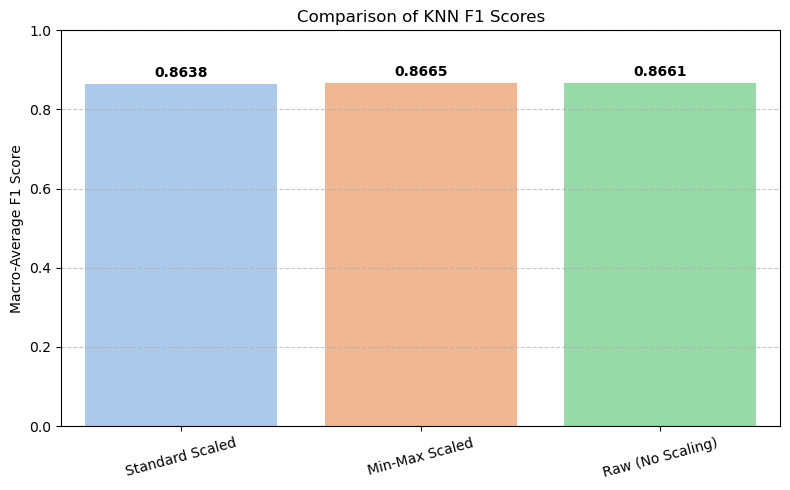

In [54]:
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=scores, hue=labels, palette="pastel")
for i, score in enumerate(scores):
    plt.text(i, score + 0.01, f"{score:.4f}", ha='center', va='bottom', fontweight='bold')
plt.ylim(0, 1.0)
plt.ylabel('Macro-Average F1 Score')
plt.title('Comparison of KNN F1 Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [55]:
best_knn_model_name = max(knn_f1_scores, key=knn_f1_scores.get)
best_knn_f1_score = knn_f1_scores[best_knn_model_name]
print(f"\n✅ Best Performing KNN Model: {best_knn_model_name}")
print(f"🏆 Best Macro-Average F1 Score: {best_knn_f1_score:.4f}")


✅ Best Performing KNN Model: Min-Max Scaled
🏆 Best Macro-Average F1 Score: 0.8665


## Random Forest

In [57]:
param_grid_rf = {
  'n_estimators': [50, 100],
    'max_depth': [None, 20],
    'min_samples_split': [2],
}

### using Standard Scaled data

In [59]:
grid_rf_s = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,
    n_jobs=-1,
    scoring='f1_macro',
    verbose=1
)

grid_rf_s.fit(X_train_s_final, y_train_s_final.values.ravel())
best_rf_s = grid_rf_s.best_estimator_

rf_y_pred_s = best_rf_s.predict(X_val_s)

print("Validation Set Classification Report (Standard Scaled + PCA):")
print(classification_report(y_val_s, rf_y_pred_s, digits=4))

rf_f1_macro_s = f1_score(y_val_s, rf_y_pred_s, average='macro')
print(f"Macro-Average F1 Score (Standard Scaled + PCA): {rf_f1_macro_s:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Validation Set Classification Report (Standard Scaled + PCA):
              precision    recall  f1-score   support

           0     0.8206    0.8617    0.8407      1200
           1     0.9940    0.9592    0.9763      1200
           2     0.7817    0.8025    0.7919      1200
           3     0.8741    0.8908    0.8824      1200
           4     0.7803    0.8167    0.7980      1200
           5     0.9346    0.9283    0.9314      1200
           6     0.7186    0.6108    0.6604      1200
           7     0.9316    0.9075    0.9194      1200
           8     0.9371    0.9683    0.9525      1200
           9     0.9144    0.9525    0.9331      1200

    accuracy                         0.8698     12000
   macro avg     0.8687    0.8698    0.8686     12000
weighted avg     0.8687    0.8698    0.8686     12000

Macro-Average F1 Score (Standard Scaled + PCA): 0.8686


### using Min Max Scaled Data

In [61]:
grid_rf_m = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,
    n_jobs=-1,
    scoring='f1_macro',
    verbose=1
)

grid_rf_m.fit(X_train_m_final, y_train_m_final.values.ravel())
best_rf_m = grid_rf_m.best_estimator_

rf_y_pred_m = best_rf_m.predict(X_val_m)

print("Validation Set Classification Report (Min-Max Scaled):")
print(classification_report(y_val_m, rf_y_pred_m, digits=4))

rf_f1_macro_m = f1_score(y_val_m, rf_y_pred_m, average='macro')
print(f"Macro-Average F1 Score (Min-Max Scaled): {rf_f1_macro_m:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Validation Set Classification Report (Min-Max Scaled):
              precision    recall  f1-score   support

           0     0.8080    0.8625    0.8343      1200
           1     0.9931    0.9617    0.9771      1200
           2     0.7708    0.8100    0.7899      1200
           3     0.8721    0.8867    0.8793      1200
           4     0.7708    0.8125    0.7911      1200
           5     0.9323    0.9292    0.9307      1200
           6     0.7399    0.5950    0.6596      1200
           7     0.9323    0.9183    0.9253      1200
           8     0.9396    0.9592    0.9493      1200
           9     0.9252    0.9583    0.9415      1200

    accuracy                         0.8693     12000
   macro avg     0.8684    0.8693    0.8678     12000
weighted avg     0.8684    0.8693    0.8678     12000

Macro-Average F1 Score (Min-Max Scaled): 0.8678


### using No Scaling

In [63]:
grid_rf_raw = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=3,
    n_jobs=-1,
    scoring='f1_macro',
    verbose=0
)

grid_rf_raw.fit(X_train_raw_final, y_train_raw_final.values.ravel())
best_rf_raw = grid_rf_raw.best_estimator_

rf_y_pred_raw = best_rf_raw.predict(X_val_raw)

print("Validation Set Classification Report (Raw):")
print(classification_report(y_val_raw, rf_y_pred_raw, digits=4))

rf_f1_macro_raw = f1_score(y_val_raw, rf_y_pred_raw, average='macro')
print(f"Macro-Average F1 Score (Raw): {rf_f1_macro_raw:.4f}")

Validation Set Classification Report (Raw):
              precision    recall  f1-score   support

           0     0.8245    0.8692    0.8462      1200
           1     0.9957    0.9583    0.9766      1200
           2     0.7543    0.8108    0.7815      1200
           3     0.8643    0.8917    0.8778      1200
           4     0.7684    0.7933    0.7806      1200
           5     0.9376    0.9383    0.9379      1200
           6     0.7361    0.5975    0.6596      1200
           7     0.9282    0.9158    0.9220      1200
           8     0.9435    0.9600    0.9517      1200
           9     0.9262    0.9517    0.9388      1200

    accuracy                         0.8687     12000
   macro avg     0.8679    0.8687    0.8673     12000
weighted avg     0.8679    0.8687    0.8673     12000

Macro-Average F1 Score (Raw): 0.8673


### Best Performing Random Forest Method

In [65]:
rf_f1_scores = {
    'Standard Scaled + PCA': rf_f1_macro_s,
    'Min-Max Scaled': rf_f1_macro_m,
    'Raw (No Scaling)': rf_f1_macro_raw
}

labels = list(rf_f1_scores.keys())
scores = list(rf_f1_scores.values())


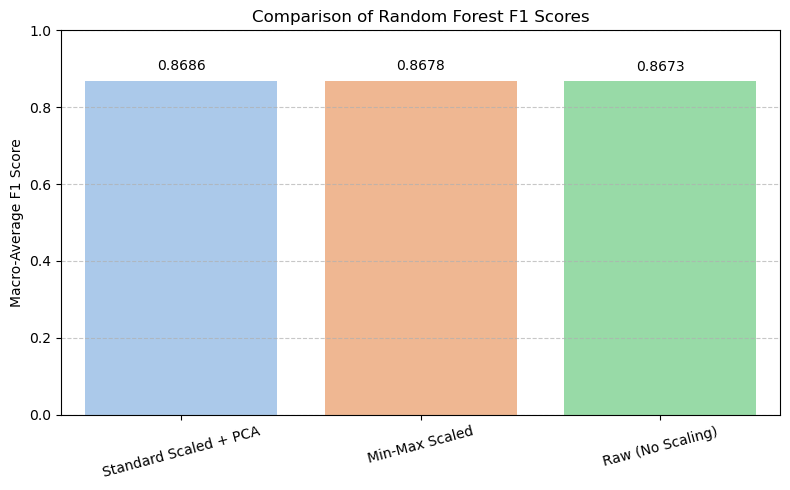

In [66]:
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=scores,hue=labels, palette="pastel")
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.4f}", ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1.0)
plt.ylabel('Macro-Average F1 Score')
plt.title('Comparison of Random Forest F1 Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [67]:
best_rf_model_name = max(rf_f1_scores, key=rf_f1_scores.get)
best_rf_f1_score = rf_f1_scores[best_rf_model_name]

print(f"\n✅ Best Performing Random Forest Model: {best_rf_model_name}")
print(f"🏆 Best Macro-Average F1 Score: {best_rf_f1_score:.4f}")


✅ Best Performing Random Forest Model: Standard Scaled + PCA
🏆 Best Macro-Average F1 Score: 0.8686


## SVM (Linear)

In [69]:
param_grid = {
    'C':  [0.1, 1, 10]
}


### using Standard Scaled Data

In [71]:
svm_grid_s = GridSearchCV(
    estimator=LinearSVC(max_iter=1000, random_state=42, dual=False),
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

svm_grid_s.fit(X_train_s_final, y_train_s_final.values.ravel())
svm_y_pred_s = svm_grid_s.predict(X_val_s)

print("Validation Set Classification Report (Standard Scaled):")
print(classification_report(y_val_s, svm_y_pred_s, digits=4))

svm_f1_macro_s = f1_score(y_val_s, svm_y_pred_s, average='macro')
print(f"Macro-Average F1 Score (Standard Scaled): {svm_f1_macro_s:.4f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Validation Set Classification Report (Standard Scaled):
              precision    recall  f1-score   support

           0     0.7905    0.8300    0.8098      1200
           1     0.9681    0.9617    0.9649      1200
           2     0.7455    0.7275    0.7364      1200
           3     0.8115    0.8608    0.8354      1200
           4     0.7030    0.7733    0.7365      1200
           5     0.9205    0.9450    0.9326      1200
           6     0.6827    0.5308    0.5973      1200
           7     0.9264    0.9125    0.9194      1200
           8     0.9231    0.9500    0.9363      1200
           9     0.9459    0.9475    0.9467      1200

    accuracy                         0.8439     12000
   macro avg     0.8417    0.8439    0.8415     12000
weighted avg     0.8417    0.8439    0.8415     12000

Macro-Average F1 Score (Standard Scaled): 0.8415


### using Min Maxed Data

In [73]:
svm_grid_m = GridSearchCV(
    estimator=LinearSVC(max_iter=1000, random_state=42, dual=False),
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

svm_grid_m.fit(X_train_m_final, y_train_m_final.values.ravel())
svm_y_pred_m = svm_grid_m.predict(X_val_m)

print("Validation Set Classification Report (Standard Scaled):")
print(classification_report(y_val_m, svm_y_pred_m, digits=4))

svm_f1_macro_m = f1_score(y_val_m, svm_y_pred_m, average='macro')
print(f"Macro-Average F1 Score (Standard Scaled): {svm_f1_macro_m:.4f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Validation Set Classification Report (Standard Scaled):
              precision    recall  f1-score   support

           0     0.7981    0.8333    0.8153      1200
           1     0.9689    0.9608    0.9649      1200
           2     0.7450    0.7425    0.7437      1200
           3     0.8165    0.8642    0.8397      1200
           4     0.7266    0.7817    0.7531      1200
           5     0.9332    0.9550    0.9440      1200
           6     0.6971    0.5600    0.6211      1200
           7     0.9382    0.9233    0.9307      1200
           8     0.9282    0.9483    0.9382      1200
           9     0.9517    0.9525    0.9521      1200

    accuracy                         0.8522     12000
   macro avg     0.8504    0.8522    0.8503     12000
weighted avg     0.8504    0.8522    0.8503     12000

Macro-Average F1 Score (Standard Scaled): 0.8503


### using No Scaling 

In [75]:
svm_grid_raw = GridSearchCV(
    estimator=LinearSVC(max_iter=1000, random_state=42, dual=False),
    param_grid=param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

svm_grid_raw.fit(X_train_raw_final, y_train_raw_final.values.ravel())
svm_y_pred_raw = svm_grid_raw.predict(X_val_raw)

print("Validation Set Classification Report (Standard Scaled):")
print(classification_report(y_val_raw, svm_y_pred_raw, digits=4))

svm_f1_macro_raw = f1_score(y_val_raw, svm_y_pred_raw, average='macro')
print(f"Macro-Average F1 Score (Standard Scaled): {svm_f1_macro_raw:.4f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Validation Set Classification Report (Standard Scaled):
              precision    recall  f1-score   support

           0     0.7968    0.8333    0.8147      1200
           1     0.9714    0.9608    0.9661      1200
           2     0.7431    0.7425    0.7428      1200
           3     0.8170    0.8633    0.8395      1200
           4     0.7279    0.7825    0.7542      1200
           5     0.9306    0.9492    0.9398      1200
           6     0.6981    0.5608    0.6220      1200
           7     0.9365    0.9225    0.9295      1200
           8     0.9283    0.9492    0.9386      1200
           9     0.9510    0.9542    0.9526      1200

    accuracy                         0.8518     12000
   macro avg     0.8501    0.8518    0.8500     12000
weighted avg     0.8501    0.8518    0.8500     12000

Macro-Average F1 Score (Standard Scaled): 0.8500


### Best Performing SVM (Linear) Method 

In [77]:
svm_f1_scores = {
    'Standard Scaled + PCA': svm_f1_macro_s,
    'Min-Max Scaled + PCA': svm_f1_macro_m,
    'Raw (No Scaling)': svm_f1_macro_raw
}

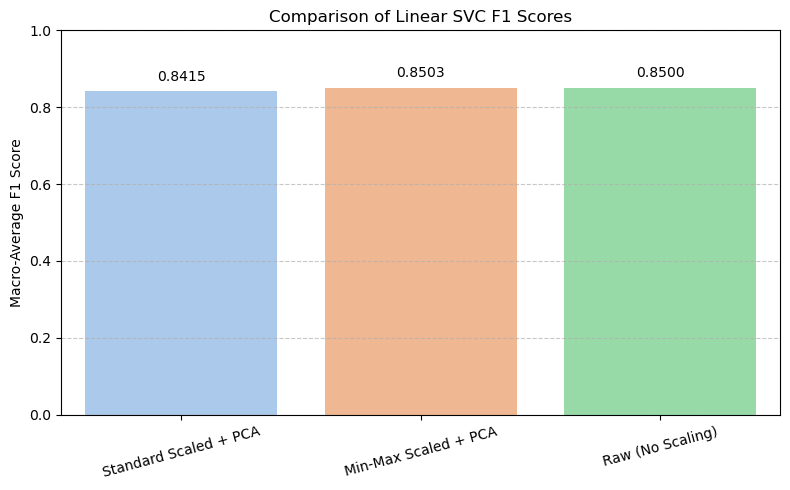

In [78]:
labels = list(svm_f1_scores.keys())
scores = list(svm_f1_scores.values())

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=scores, hue=labels, palette="pastel")
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.4f}", ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1.0)
plt.ylabel('Macro-Average F1 Score')
plt.title('Comparison of Linear SVC F1 Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [ ]:
best_svm_model_name = max(svm_f1_scores, key=svm_f1_scores.get)
best_svm_f1_score = svm_f1_scores[best_svm_model_name]

print(f"\n✅ Best Performing Linear SVC Model: {best_svm_model_name}")
print(f"🏆 Best Macro-Average F1 Score: {best_svm_f1_score:.4f}")


✅ Best Performing Linear SVC Model: Min-Max Scaled + PCA
🏆 Best Macro-Average F1 Score: 0.8503


## SVM (RBF)

In [ ]:
svm_rbf_param_grid = {
    'C': [0.1, 1, 10],
}

### using Standard Scaled Data

In [ ]:
svm_rbf_grid_s = GridSearchCV(
    estimator=SVC(kernel='rbf', random_state=42, gamma='auto'),
    param_grid=svm_rbf_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

svm_rbf_grid_s.fit(X_train_s_final, y_train_s_final.values.ravel())
svm_rbf_y_pred_s = svm_rbf_grid_s.predict(X_val_s)

print("Validation Set Classification Report (Standard Scaled):")
print(classification_report(y_val_s, svm_rbf_y_pred_s, digits=4))

svm_rbf_f1_macro_s = f1_score(y_val_s, svm_rbf_y_pred_s, average='macro')
print(f"Macro-Average F1 Score (Standard Scaled): {svm_rbf_f1_macro_s:.4f}")


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Validation Set Classification Report (Standard Scaled):
              precision    recall  f1-score   support

           0     0.8633    0.8317    0.8472      1200
           1     0.9923    0.9667    0.9793      1200
           2     0.8159    0.8017    0.8087      1200
           3     0.9118    0.8875    0.8995      1200
           4     0.8268    0.7958    0.8110      1200
           5     0.9708    0.8875    0.9273      1200
           6     0.7559    0.6892    0.7210      1200
           7     0.9550    0.9383    0.9466      1200
           8     0.7124    0.9908    0.8289      1200
           9     0.9533    0.9008    0.9263      1200

    accuracy                         0.8690     12000
   macro avg     0.8758    0.8690    0.8696     12000
weighted avg     0.8758    0.8690    0.8696     12000

Macro-Average F1 Score (Standard Scaled): 0.8696


### using Min-Max Scaled Data

In [ ]:
svm_rbf_grid_m = GridSearchCV(
    estimator=SVC(kernel='rbf', random_state=42, gamma='auto'),
    param_grid=svm_rbf_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

svm_rbf_grid_m.fit(X_train_m_final, y_train_m_final.values.ravel())
svm_rbf_y_pred_m = svm_rbf_grid_m.predict(X_val_m)

print("Validation Set Classification Report (Min-Max Scaled):")
print(classification_report(y_val_m, svm_rbf_y_pred_m, digits=4))

svm_rbf_f1_macro_m = f1_score(y_val_m, svm_rbf_y_pred_m, average='macro')
print(f"Macro-Average F1 Score (Min-Max Scaled): {svm_rbf_f1_macro_m:.4f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Validation Set Classification Report (Min-Max Scaled):
              precision    recall  f1-score   support

           0     0.8458    0.8867    0.8657      1200
           1     0.9890    0.9725    0.9807      1200
           2     0.8414    0.8358    0.8386      1200
           3     0.9038    0.9083    0.9061      1200
           4     0.8232    0.8458    0.8344      1200
           5     0.9773    0.9692    0.9732      1200
           6     0.7707    0.7308    0.7502      1200
           7     0.9438    0.9658    0.9547      1200
           8     0.9815    0.9750    0.9783      1200
           9     0.9755    0.9617    0.9685      1200

    accuracy                         0.9052     12000
   macro avg     0.9052    0.9052    0.9050     12000
weighted avg     0.9052    0.9052    0.9050     12000

Macro-Average F1 Score (Min-Max Scaled): 0.9050


### using No Scaling

In [ ]:
svm_rbf_grid_raw = GridSearchCV(
    estimator=SVC(kernel='rbf', random_state=42, gamma='auto'),
    param_grid=svm_rbf_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

svm_rbf_grid_raw.fit(X_train_raw_final, y_train_raw_final.values.ravel())
svm_rbf_y_pred_raw = svm_rbf_grid_raw.predict(X_val_raw)

print("Validation Set Classification Report (Raw, No Scaling):")
print(classification_report(y_val_raw, svm_rbf_y_pred_raw, digits=4))

svm_rbf_f1_macro_raw = f1_score(y_val_raw, svm_rbf_y_pred_raw, average='macro')
print(f"Macro-Average F1 Score (Raw, No Scaling): {svm_rbf_f1_macro_raw:.4f}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Validation Set Classification Report (Raw, No Scaling):
              precision    recall  f1-score   support

           0     1.0000    0.0100    0.0198      1200
           1     0.0000    0.0000    0.0000      1200
           2     1.0000    0.0042    0.0083      1200
           3     1.0000    0.0042    0.0083      1200
           4     0.0000    0.0000    0.0000      1200
           5     0.0000    0.0000    0.0000      1200
           6     0.0000    0.0000    0.0000      1200
           7     1.0000    0.0158    0.0312      1200
           8     1.0000    0.0025    0.0050      1200
           9     0.1004    1.0000    0.1824      1200

    accuracy                         0.1037     12000
   macro avg     0.5100    0.1037    0.0255     12000
weighted avg     0.5100    0.1037    0.0255     12000

Macro-Average F1 Score (Raw, No Scaling): 0.0255


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Best Performing SVM RBF Method

In [ ]:
svm_rbf_f1_scores = {
    'Standard Scaled + PCA': svm_rbf_f1_macro_s,
    'Min-Max Scaled + PCA': svm_rbf_f1_macro_m,
    'Raw (No Scaling)': svm_rbf_f1_macro_raw
}


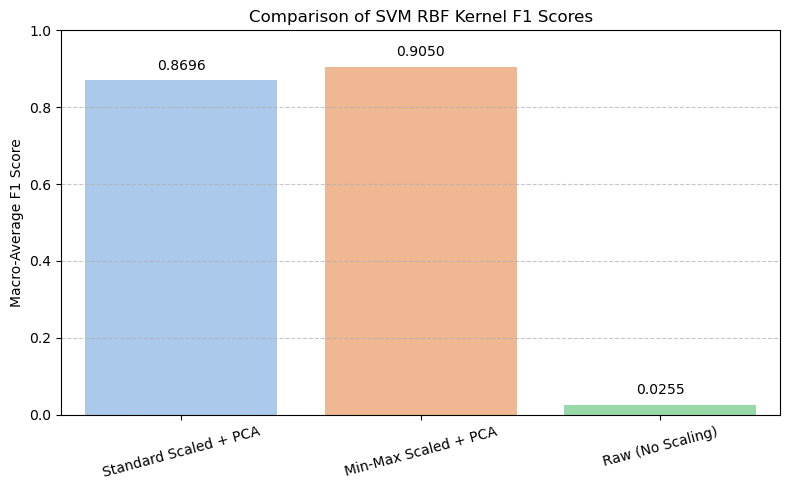

In [ ]:
labels = list(svm_rbf_f1_scores.keys())
scores = list(svm_rbf_f1_scores.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=scores, hue=labels, palette="pastel")
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.4f}", ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1.0)
plt.ylabel('Macro-Average F1 Score')
plt.title('Comparison of SVM RBF Kernel F1 Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [ ]:
best_svm_rbf_model_name = max(svm_rbf_f1_scores, key=svm_rbf_f1_scores.get)
best_svm_rbf_f1_score = svm_rbf_f1_scores[best_svm_rbf_model_name]

print(f"\n✅ Best Performing SVM RBF Model: {best_svm_rbf_model_name}")
print(f"🏆 Best Macro-Average F1 Score: {best_svm_rbf_f1_score:.4f}")


✅ Best Performing SVM RBF Model: Min-Max Scaled + PCA
🏆 Best Macro-Average F1 Score: 0.9050


## XGBoost

In [ ]:
xgb_param_grid = {
    'n_estimators': [100],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8]
}


### using Standard Scaled Data

In [ ]:
xgb_grid_s = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, objective="multi:softmax"),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

xgb_grid_s.fit(X_train_s_final, y_train_s_final.values.ravel())
xgb_y_pred_s = xgb_grid_s.predict(X_val_s)

print("Validation Set Classification Report (Standard Scaled + PCA):")
print(classification_report(y_val_s, xgb_y_pred_s, digits=4))
xgb_f1_macro_s = f1_score(y_val_s, xgb_y_pred_s, average='macro')
print(f"Macro-Average F1 Score (Standard Scaled): {xgb_f1_macro_s:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Validation Set Classification Report (Standard Scaled + PCA):
              precision    recall  f1-score   support

           0     0.8202    0.8667    0.8428      1200
           1     0.9898    0.9667    0.9781      1200
           2     0.7779    0.8025    0.7900      1200
           3     0.8844    0.8858    0.8851      1200
           4     0.7890    0.7975    0.7932      1200
           5     0.9478    0.9383    0.9430      1200
           6     0.7102    0.6433    0.6751      1200
           7     0.9326    0.9342    0.9334      1200
           8     0.9569    0.9625    0.9597      1200
           9     0.9330    0.9508    0.9418      1200

    accuracy                         0.8748     12000
   macro avg     0.8742    0.8748    0.8742     12000
weighted avg     0.8742    0.8748    0.8742     12000

Macro-Average F1 Score (Standard Scaled): 0.8742


### using Min Max Scaled Data

In [ ]:
xgb_grid_m = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42, objective="multi:softmax"),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

xgb_grid_m.fit(X_train_m_final, y_train_m_final.values.ravel())
xgb_y_pred_m = xgb_grid_m.predict(X_val_m)

print("Validation Set Classification Report (MinMax Scaled + PCA):")
print(classification_report(y_val_m, xgb_y_pred_m, digits=4))
xgb_f1_macro_m = f1_score(y_val_m, xgb_y_pred_m, average='macro')
print(f"Macro-Average F1 Score (MinMax Scaled): {xgb_f1_macro_m:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Validation Set Classification Report (MinMax Scaled + PCA):
              precision    recall  f1-score   support

           0     0.8286    0.8700    0.8488      1200
           1     0.9881    0.9683    0.9781      1200
           2     0.7885    0.7892    0.7888      1200
           3     0.8750    0.8808    0.8779      1200
           4     0.7817    0.8025    0.7919      1200
           5     0.9528    0.9417    0.9472      1200
           6     0.7140    0.6533    0.6823      1200
           7     0.9293    0.9308    0.9301      1200
           8     0.9497    0.9592    0.9544      1200
           9     0.9363    0.9558    0.9460      1200

    accuracy                         0.8752     12000
   macro avg     0.8744    0.8752    0.8746     12000
weighted avg     0.8744    0.8752    0.8746     12000

Macro-Average F1 Score (MinMax Scaled): 0.8746


### using No Scaling

In [ ]:
xgb_grid_raw = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=xgb_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

xgb_grid_raw.fit(X_train_raw_final, y_train_raw_final.values.ravel())
xgb_y_pred_raw = xgb_grid_raw.predict(X_val_raw)

print("Validation Set Classification Report (Raw, No Scaling):")
print(classification_report(y_val_raw, xgb_y_pred_raw, digits=4))
xgb_f1_macro_raw = f1_score(y_val_raw, xgb_y_pred_raw, average='macro')
print(f"Macro-Average F1 Score (Raw, No Scaling): {xgb_f1_macro_raw:.4f}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Validation Set Classification Report (Raw, No Scaling):
              precision    recall  f1-score   support

           0     0.8293    0.8625    0.8456      1200
           1     0.9856    0.9675    0.9765      1200
           2     0.7831    0.7975    0.7903      1200
           3     0.8772    0.8750    0.8761      1200
           4     0.7791    0.8025    0.7906      1200
           5     0.9568    0.9417    0.9492      1200
           6     0.7074    0.6467    0.6757      1200
           7     0.9282    0.9375    0.9328      1200
           8     0.9519    0.9567    0.9543      1200
           9     0.9395    0.9575    0.9484      1200

    accuracy                         0.8745     12000
   macro avg     0.8738    0.8745    0.8739     12000
weighted avg     0.8738    0.8745    0.8739     12000

Macro-Average F1 Score (Raw, No Scaling): 0.8739


### Best Performing XGBoost Method

In [ ]:
xgb_f1_scores = {
    'Standard Scaled + PCA': xgb_f1_macro_s,
    'Min-Max Scaled + PCA': xgb_f1_macro_m,
    'Raw (No Scaling)': xgb_f1_macro_raw
}

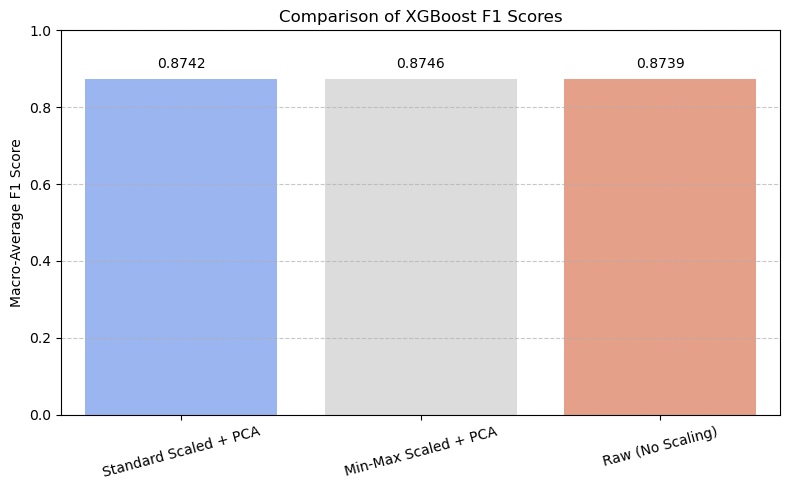

In [ ]:
labels = list(xgb_f1_scores.keys())
scores = list(xgb_f1_scores.values())

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=scores, hue=labels, palette="coolwarm")
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.4f}", ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1.0)
plt.ylabel('Macro-Average F1 Score')
plt.title('Comparison of XGBoost F1 Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [ ]:
best_xgb_model_name = max(xgb_f1_scores, key=xgb_f1_scores.get)
best_xgb_f1_score = xgb_f1_scores[best_xgb_model_name]

print(f"\n✅ Best Performing XGBoost Model: {best_xgb_model_name}")
print(f"🏆 Best Macro-Average F1 Score: {best_xgb_f1_score:.4f}")


✅ Best Performing XGBoost Model: Min-Max Scaled + PCA
🏆 Best Macro-Average F1 Score: 0.8746


## Gaussian Naive Bayes

In [ ]:
nb_param_grid = {
    'var_smoothing': np.logspace(-11, -7, 5)
}


### using Standard Scaled Data

In [ ]:
nb_grid_s = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=nb_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

nb_grid_s.fit(X_train_s_final, y_train_s_final.values.ravel())
nb_pred_s = nb_grid_s.predict(X_val_s)

print("Validation Set Classification Report (Standard Scaled):")
print(classification_report(y_val_s, nb_pred_s, digits=4))
nb_f1_macro_s = f1_score(y_val_s, nb_pred_s, average='macro')
print(f"Macro-Average F1 Score (Standard Scaled): {nb_f1_macro_s:.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Validation Set Classification Report (Standard Scaled):
              precision    recall  f1-score   support

           0     0.7821    0.7117    0.7452      1200
           1     0.9936    0.9058    0.9477      1200
           2     0.6825    0.5750    0.6242      1200
           3     0.6468    0.8792    0.7453      1200
           4     0.4942    0.7775    0.6043      1200
           5     0.8139    0.5867    0.6818      1200
           6     0.2896    0.1433    0.1918      1200
           7     0.6798    0.8900    0.7708      1200
           8     0.5772    0.6292    0.6021      1200
           9     0.8721    0.6875    0.7689      1200

    accuracy                         0.6786     12000
   macro avg     0.6832    0.6786    0.6682     12000
weighted avg     0.6832    0.6786    0.6682     12000

Macro-Average F1 Score (Standard Scaled): 0.6682


### using Min Maxed Data

In [ ]:
nb_grid_m = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=nb_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

nb_grid_m.fit(X_train_m_final, y_train_m_final.values.ravel())
nb_pred_m = nb_grid_m.predict(X_val_m)

print("Validation Set Classification Report (Min-Max Scaled):")
print(classification_report(y_val_m, nb_pred_m, digits=4))
nb_f1_macro_m = f1_score(y_val_m, nb_pred_m, average='macro')
print(f"Macro-Average F1 Score (Min-Max Scaled): {nb_f1_macro_m:.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Validation Set Classification Report (Min-Max Scaled):
              precision    recall  f1-score   support

           0     0.7359    0.7733    0.7542      1200
           1     0.9936    0.9025    0.9459      1200
           2     0.7146    0.6300    0.6696      1200
           3     0.8235    0.7892    0.8060      1200
           4     0.7298    0.6708    0.6991      1200
           5     0.8660    0.7650    0.8124      1200
           6     0.5370    0.5558    0.5463      1200
           7     0.7843    0.8667    0.8234      1200
           8     0.6847    0.8742    0.7679      1200
           9     0.9168    0.9000    0.9083      1200

    accuracy                         0.7728     12000
   macro avg     0.7786    0.7728    0.7733     12000
weighted avg     0.7786    0.7728    0.7733     12000

Macro-Average F1 Score (Min-Max Scaled): 0.7733


### using No Scaling

In [ ]:
nb_grid_raw = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=nb_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

nb_grid_raw.fit(X_train_raw_final, y_train_raw_final.values.ravel())
nb_pred_raw = nb_grid_raw.predict(X_val_raw)

print("Validation Set Classification Report (Raw):")
print(classification_report(y_val_raw, nb_pred_raw, digits=4))
nb_f1_macro_raw = f1_score(y_val_raw, nb_pred_raw, average='macro')
print(f"Macro-Average F1 Score (Raw): {nb_f1_macro_raw:.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Validation Set Classification Report (Raw):
              precision    recall  f1-score   support

           0     0.7328    0.7725    0.7521      1200
           1     0.9936    0.9008    0.9449      1200
           2     0.7143    0.6292    0.6690      1200
           3     0.8209    0.7908    0.8056      1200
           4     0.7318    0.6708    0.7000      1200
           5     0.8650    0.7633    0.8110      1200
           6     0.5372    0.5542    0.5455      1200
           7     0.7827    0.8675    0.8229      1200
           8     0.6839    0.8725    0.7668      1200
           9     0.9167    0.8983    0.9074      1200

    accuracy                         0.7720     12000
   macro avg     0.7779    0.7720    0.7725     12000
weighted avg     0.7779    0.7720    0.7725     12000

Macro-Average F1 Score (Raw): 0.7725


### Best Performing Naive Bayes Method

In [ ]:
nb_f1_scores = {
    'Standard Scaled + PCA': nb_f1_macro_s,
    'Min-Max Scaled + PCA': nb_f1_macro_m,
    'Raw (No Scaling)': nb_f1_macro_raw
}

labels = list(nb_f1_scores.keys())
scores = list(nb_f1_scores.values())

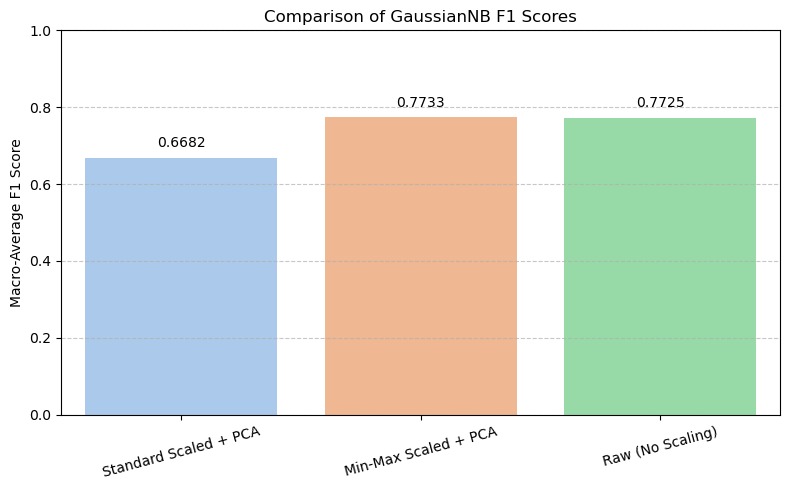

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=scores, hue=labels, palette="pastel")
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.4f}", ha='center', va='bottom', fontsize=10)
plt.ylim(0, 1.0)
plt.ylabel('Macro-Average F1 Score')
plt.title('Comparison of GaussianNB F1 Scores')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [ ]:
best_nb_model_name = max(nb_f1_scores, key=nb_f1_scores.get)
best_nb_f1_score = nb_f1_scores[best_nb_model_name]

print(f"\n✅ Best Performing Naive Bayes Model: {best_nb_model_name}")
print(f"🏆 Best Macro-Average F1 Score: {best_nb_f1_score:.4f}")


✅ Best Performing Naive Bayes Model: Min-Max Scaled + PCA
🏆 Best Macro-Average F1 Score: 0.7733


## Comparison of All Classical Classification Methods

In [ ]:
best_f1_scores = {
    "Logistic Regression (Min-Max Scaled)": best_lr_f1_score,
    "Softmax Regression (Min-Max Scaled)": best_sm_f1_score,
    "KNN (Min-Max Scaled)": best_knn_f1_score,
    "Random Forest (Standard Scaled)": best_rf_f1_score, 
    "SVM Linear (Min-Max Scaled)": best_svm_f1_score, 
    "SVM RBF (Min-Max Scaled)":best_svm_rbf_f1_score,
    "XGBoost (Min-Max Scaled)": best_xgb_f1_score,
    "Gaussian NB (Min-Max Scaled)": best_nb_f1_score
}

In [ ]:
sorted_scores = dict(sorted(best_f1_scores.items(), key=lambda x: x[1], reverse=True))

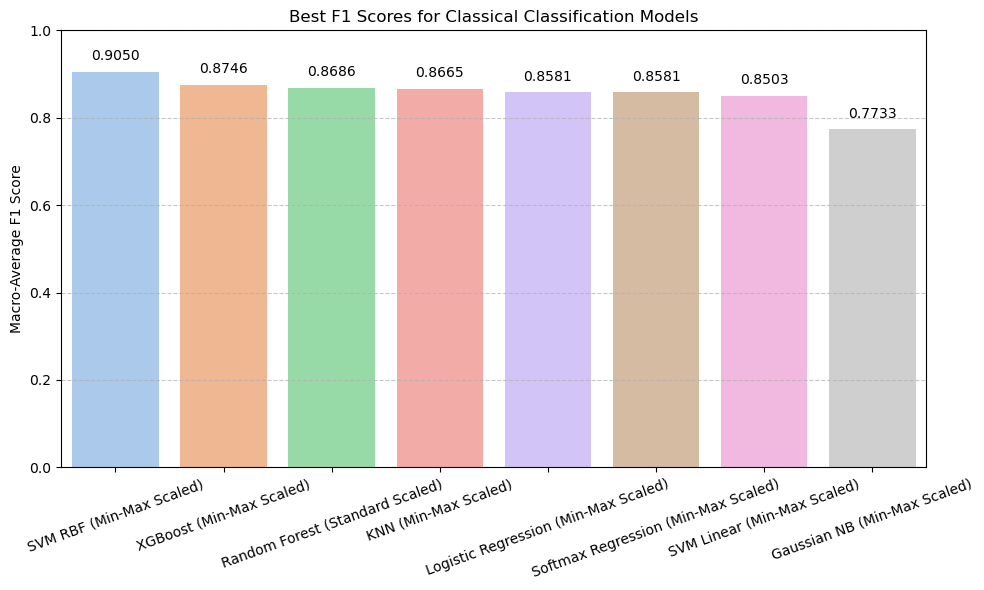

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_scores.keys()), y=list(sorted_scores.values()), hue=list(sorted_scores.keys()), palette="pastel", legend=False)
plt.xticks(rotation=20)
plt.ylim(0, 1.0)
plt.ylabel("Macro-Average F1 Score")
plt.title("Best F1 Scores for Classical Classification Models")

# Annotate bars with values
for i, score in enumerate(sorted_scores.values()):
    plt.text(i, score + 0.02, f"{score:.4f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Using Best Model (SVM RBF Min-Max Scaled) on Test Set

In [ ]:
svm_rbf_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1e-4, 1e-3, 1e-2, 'scale', 'auto']
}

In [ ]:
svm_rbf_grid_m = GridSearchCV(
    estimator=SVC(kernel='rbf', random_state=42, gamma='auto'),
    param_grid=svm_rbf_param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

svm_rbf_grid_m.fit(X_train_m_final, y_train_m_final.values.ravel())
svm_rbf_y_test_pred_m_new = svm_rbf_grid_m.predict(X_test_m_pca)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


In [ ]:
df_preds = pd.DataFrame({
    'Prediction': svm_rbf_y_test_pred_m_new
})

# Save to CSV
output_path = 'Rivano_FinalLabClassificationResults_SVMRBF.csv'
df_preds.to_csv(output_path, index=False)

print(f"✅ Saved predictions to {output_path}")

✅ Saved predictions to Rivano_FinalLabClassificationResults_SVMRBF.csv
